In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as math
import itertools
import os
import scipy
from scipy.optimize import curve_fit
from scipy.special import wofz

In [2]:
def read_text_file(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()     # Read lines from the file

            column1 = []                 # Initialize empty arrays for each column
            column2 = []

            for i, line in enumerate(lines):   # Process each line and extract columns
                if i == 0:
                    continue

                data = line.strip().split()

                if len(data) >= 2:
                    column1.append(float(data[0]))
                    column2.append(float(data[1]))

            return column1, column2

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

column1, column2 = read_text_file('./Data/background2.txt' )  # background
background_df = [column1, column2]

column1, column2 = read_text_file('./Data/Co60_Hist.txt')
cobalt_df = [column1, column2]

column1, column2 = read_text_file('./Data/Cs137_Hist.txt')
cesium_df = [column1, column2]

column1, column2 = read_text_file('./Data/Ba133_Hist.txt')
barium_df = [column1, column2]

column1, column2 = read_text_file('./Data/Am241_Hist.txt')
americanium_df = [column1, column2]

column1, column2 = read_text_file('./Data/Unknown_Hist.txt')
unknown_df = [column1, column2]

column1, column2 = read_text_file('./Data/Unknown_Hist2.txt')
unknown2_df = [column1, column2]

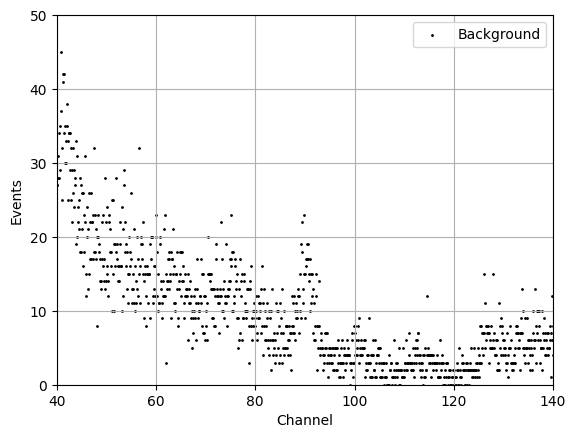

In [3]:
# Plot the background and other data

fig, ax = plt.subplots()

plt.scatter(background_df[0], background_df[1], label='Background', alpha=1, color='black', s=1)
#plt.scatter(cobalt_df[0], cobalt_df[1], label='cobalt', alpha=1, color='blue', s=1)
#plt.scatter(cesium_df[0], cesium_df[1], label='cesium', alpha=1, color='orange', s=1)
#plt.scatter(barium_df[0], barium_df[1], label='barium', alpha=1, color='violet', s=1)
#plt.scatter(americanium_df[0], americanium_df[1], label='americanium', alpha=1, color='red', s=1)
#plt.scatter(unknown_df[0], unknown_df[1], label='unknown sample', alpha=1, color='red', s=1)
#plt.scatter(unknown2_df[0], unknown2_df[1], label='unknown sample', alpha=1, color='blue', s=1)

plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Channel')
plt.ylabel('Events')
plt.xlim(40,140)
plt.ylim(0,50)
plt.savefig('./figures/background_zoom.pdf',dpi=100,bbox_inches='tight')

E0: 46.04546999242012 +- 0.02255017908716169
A: 38333.571956057574 +- 1628.9180669225213
width: -6.584657360904002 +- 0.15247672983786742


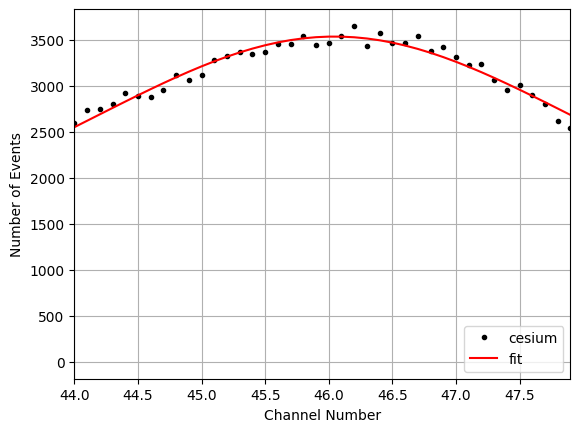

In [24]:
def BW(x, E0, A, width):
    return A / ( (x-E0)**2 + width**2/4)

def fit(df, element, lower, upper):

    lower_i, upper_i = 0, 0
    for i in range(len(df[0])):
        if df[0][i] == lower:
            lower_i = i
        if df[0][i] == upper:
            upper_i = i

    fitting_df = [[], []]
    fitting_df[0] = df[0][lower_i:upper_i]
    fitting_df[1] = df[1][lower_i:upper_i]

    initial_guess = [10, 10, 10]
    popt, pcov = curve_fit(BW, fitting_df[0], fitting_df[1], p0=initial_guess)
    E0, A, width = popt
    fit = [BW(x, E0, A, width) for x in fitting_df[0]]  # get fitted curve

    E0_err, A_err, width_err= np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2])

    print('E0:', E0, '+-', E0_err)
    print('A:', A, '+-', A_err)
    print('width:', width, '+-', width_err)

    plt.xlim(min(fitting_df[0]), max(fitting_df[0]))
    plt.plot(df[0], df[1], 'o', label=element, alpha=1, color='black', markersize='3')
    plt.plot(fitting_df[0], fit, label='fit', alpha=1, color='red')
    plt.legend(loc='lower right')
    plt.grid(True)
    #plt.ylim(0,25)
    plt.xlabel('Channel Number')
    plt.ylabel('Number of Events')
    plt.savefig('./figures/cesium.pdf',dpi=100,bbox_inches='tight')
    plt.show()

fit(cesium_df, 'cesium', 44, 48)

m: 64.2314294505394 +- 1.4805628092336884
b: 2.138662039779376 +- 1.1220719164775326


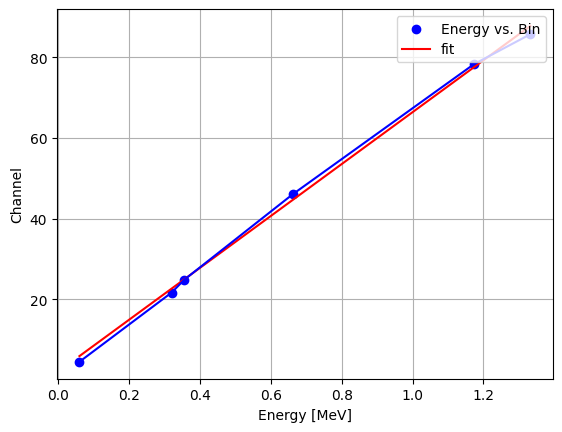

In [20]:
# Linear fit

ydata = [4.55, 21.71,  24.92, 46.04, 78.25, 85.67]
yerr = [0.03, 0.06, 0.02,  0.02, 0.03, 0.03]
xdata = [0.0595409, 0.32, 0.35601, 0.661666, 1.1732, 1.3325]

def func(x,m,b):
    return m*x + b

xdata_fit = np.linspace(min(xdata), max(xdata), 100)
initial_guess = [1, 1]
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess, sigma=yerr)
m, b = popt
fit = [func(x, m, b) for x in xdata_fit]  # get fitted curve

m_err, b_err = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])

print('m:', m, '+-', m_err)
print('b:', b, '+-', b_err)

plt.scatter(xdata, ydata, label='Energy vs. Bin', alpha=1, color='blue')
plt.errorbar(xdata, ydata, yerr, color='blue')
plt.plot(xdata_fit, fit, label='fit', alpha=1, color='red')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.savefig('./figures/trend.pdf',dpi=100,bbox_inches='tight')
plt.show()

In [23]:
result = 1460.8/90.1
print(result)
uncertainty = 1460.8/90.2**2 * 0.1
print(uncertainty)

16.213096559378467
0.017954680655454004
